# ANAS Yassine

In [1]:
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

# Réduction de dimensions et Visualisation des données

### Question 1/2

L’objectif dans cette partie est de représenter graphiquement le plus d’informations possibles contenues dans ce fichier de données et de déceler une éventuelle segmentation topologique des villes.

In [2]:
#Importation du fichier 
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values #Nous premet d'avoir les données en matrice numpy
labels = data.iloc[:, 0].values

In [3]:
data.head()

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2


In [4]:
data.columns

Index(['ville', 'janv', 'fev', 'mars', 'avril', 'mai', 'juin', 'juil', 'aout',
       'sept', 'oct', 'nov', 'dec'],
      dtype='object')

In [5]:
data.shape

(32, 13)

In [6]:
data.describe()

,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
count,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,3.931250,4.790625,8.125000,10.875000,14.35000,17.731250,19.753125,19.453125,16.903125,12.268750,7.871875,4.784375
std,2.337139,2.222083,1.778365,1.501182,1.43931,1.739751,2.043082,1.996769,1.983884,2.119866,2.182812,2.367673
min,0.400000,1.500000,5.500000,8.900000,11.60000,14.400000,15.600000,16.000000,14.700000,9.400000,4.600000,0.500000
25%,2.075000,3.125000,6.875000,9.775000,13.30000,16.575000,18.400000,18.125000,15.300000,10.650000,6.400000,3.100000
50%,3.450000,4.250000,7.700000,10.500000,13.95000,17.250000,19.200000,18.750000,16.150000,11.500000,7.150000,4.300000
75%,5.600000,6.600000,9.925000,12.150000,15.12500,18.850000,20.900000,20.925000,18.525000,14.000000,9.275000,6.500000
max,8.600000,9.100000,11.300000,13.900000,17.10000,21.100000,23.800000,23.300000,20.500000,16.500000,12.600000,9.700000


In [7]:
#Question 2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Cela va centrer et réduire les données dans X_scaled.

In [9]:
pca = PCA(n_components = 0.9)
X_pca = pca.fit_transform(X_scaled)

Lorsque on exécute PCA(n_components=0.9) et qu'on applique la transformation sur nos données standardisées, X_pca contiendra un nombre réduit de composantes principales, généralement bien inférieur au nombre de caractéristiques d'origine (12 dans notre cas). 
Ici cela signifie que deux composantes principales peuvent expliquer plus de 90% de la variance totale,. Le nombre d'axes à retenir pour conserver une bonne quantité de l'information représentée dans le nuage initial est de 2.

In [10]:
pca.explained_variance_ratio_

array([0.87268193, 0.11720602])

87 % de la variance du jeu de données se trouve le long de la première composante principale, et 12% le long de la deuxième.

In [12]:
cor = pca.components_[:2, :]
pd.DataFrame(cor, columns = data.columns[1:13])

,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,0.271510,0.288462,0.301081,0.303542,0.283531,0.278419,0.272903,0.287578,0.304720,0.303855,0.292428,0.272955
1,0.399335,0.299072,0.129431,-0.115306,-0.323143,-0.358468,-0.388796,-0.301013,-0.112316,0.122492,0.262695,0.386937


On voit que la première variable est correlée uniformement (~ 0.30) avec les variables initiales. La corrélation de la seconde variable dépend des mois, elle varie de -0.11 à 0.39 

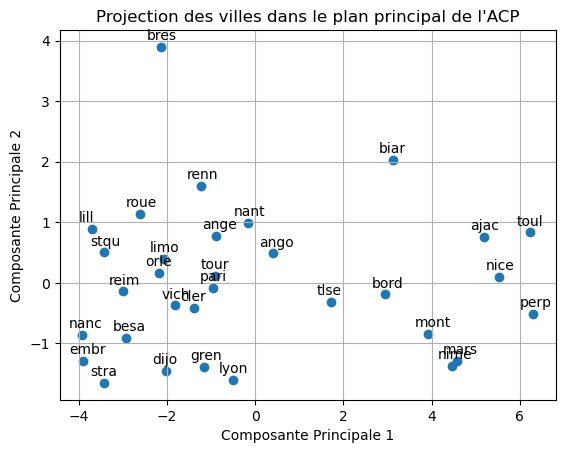

In [13]:
#visualisation graphique des villes projetées dans le plan principal.
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1])

for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-10, 5), textcoords='offset points')

plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des villes dans le plan principal de l\'ACP')
plt.grid(True)
plt.show()

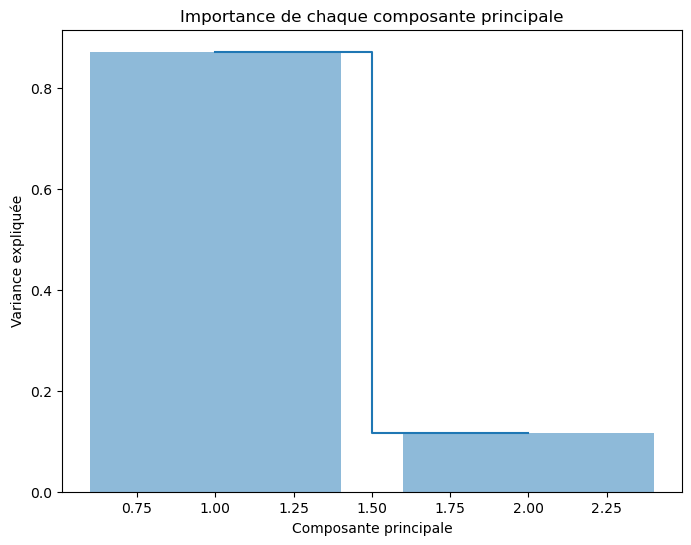

In [14]:
# Valeurs de variance expliquée pour chaque composante
explained_variance_ratio = pca.explained_variance_ratio_

# Graphique montrant l'importance de chaque composante
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, where='mid')
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée')
plt.title('Importance de chaque composante principale')
plt.show()

### Question 3

In [15]:
#Importation du fichier 
data = pd.read_csv('./mammals.csv', sep=';')

In [16]:
data.head()

,Species,BodyW,BrainW,SWS,PS,TS,LifeSpan,GT,PI,SEI,ODI
0,African elephant,6654.000,5712.0,8.35,1.8,3.3,38.6,645.0,3,5,3
1,African giant pouched rat,1.000,6.6,6.30,2.0,8.3,4.5,42.0,3,1,3
2,Arctic Fox,3.385,44.5,8.35,1.8,12.5,14.0,60.0,1,1,1
3,Arctic ground squirrel,0.920,5.7,8.35,1.8,16.5,15.1,25.0,5,2,3
4,Asian elephant,2547.000,4603.0,2.10,1.8,3.9,69.0,624.0,3,5,4


In [17]:
data.columns

Index(['Species', 'BodyW', 'BrainW', 'SWS', 'PS', 'TS', 'LifeSpan', 'GT', 'PI',
       'SEI', 'ODI'],
      dtype='object')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   62 non-null     object 
 1   BodyW     62 non-null     float64
 2   BrainW    62 non-null     float64
 3   SWS       62 non-null     float64
 4   PS        62 non-null     float64
 5   TS        62 non-null     float64
 6   LifeSpan  62 non-null     float64
 7   GT        62 non-null     float64
 8   PI        62 non-null     int64  
 9   SEI       62 non-null     int64  
 10  ODI       62 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 5.5+ KB


In [19]:
#Variables que l'on souhaite inclure dans l'ACP
X = data.iloc[:, 1:].values  # Exclue la première colonne (noms des espèces)
labels = data.iloc[:, 0].values  # Noms des espèces

In [20]:
X.shape #initialement, on a 10 variables 

(62, 10)

In [21]:
#On va centrer et réduire nos variables
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [22]:
pca = PCA(n_components=0.85)  # Explique 85% de la variance
X_pca = pca.fit_transform(X_standardized)

Ici 4 variables expliquent 85% de la variance de nos données initiales.

In [24]:
cor = pca.components_[:2, :]
pd.DataFrame(cor, columns = data.columns[1:13])

,BodyW,BrainW,SWS,PS,TS,LifeSpan,GT,PI,SEI,ODI
0,0.250733,0.283386,-0.321120,-0.290608,-0.385382,0.24828,0.373362,0.254237,0.381271,0.331193
1,0.441775,0.474781,0.097691,0.236799,0.091130,0.30384,0.266729,-0.425882,-0.136113,-0.377002


In [25]:
pca.explained_variance_ratio_

array([0.48017524, 0.22078825, 0.12605711, 0.06488067])

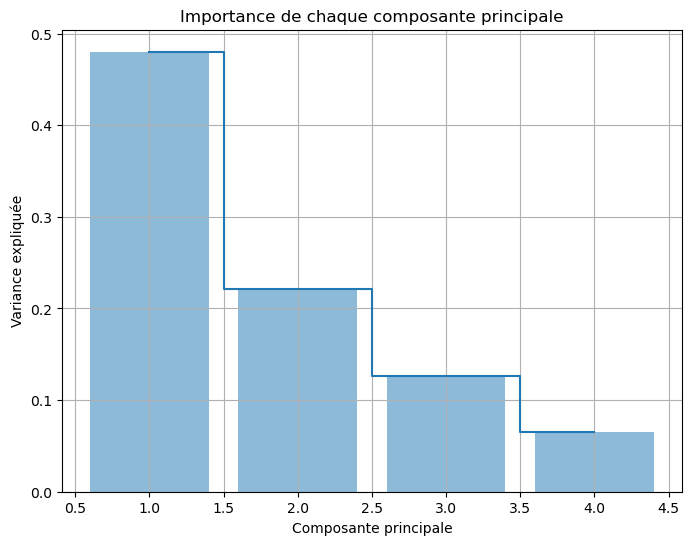

In [26]:
# Obtenir les valeurs de variance expliquée pour chaque composante
explained_variance_ratio = pca.explained_variance_ratio_

# Créer un graphique montrant l'importance de chaque composante
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, where='mid')
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée')
plt.title('Importance de chaque composante principale')
plt.grid(True)
plt.show()

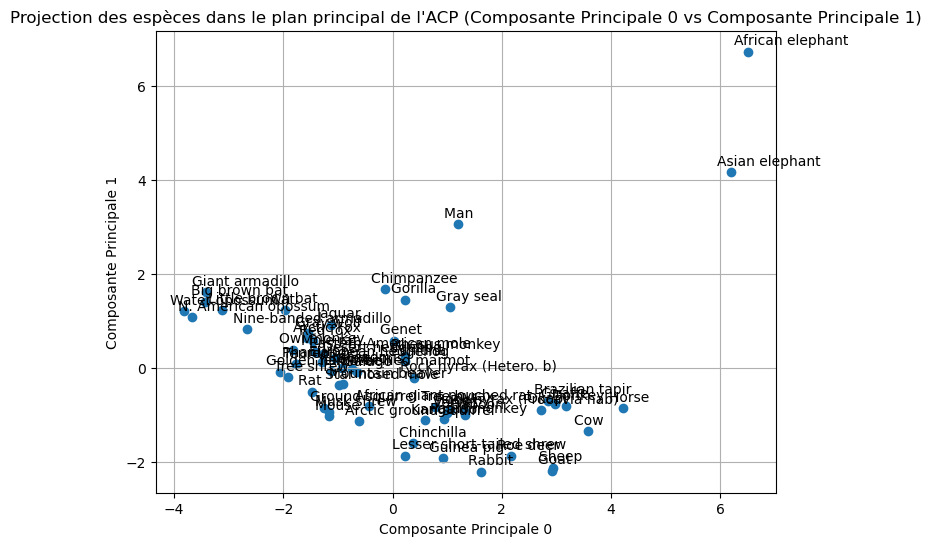

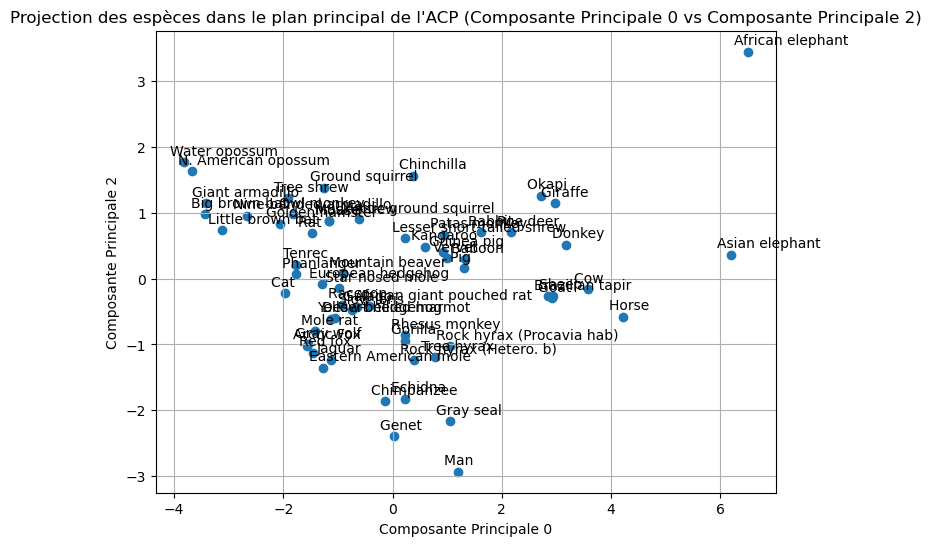

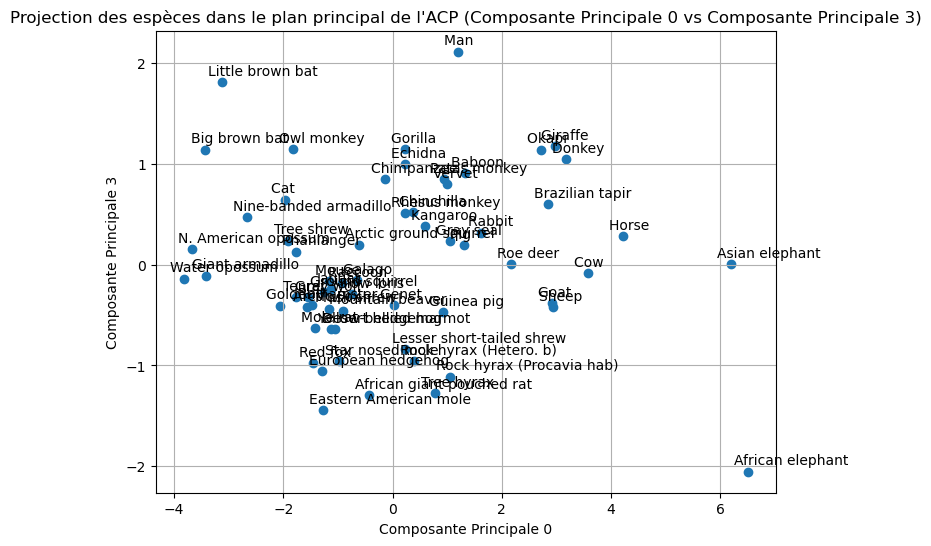

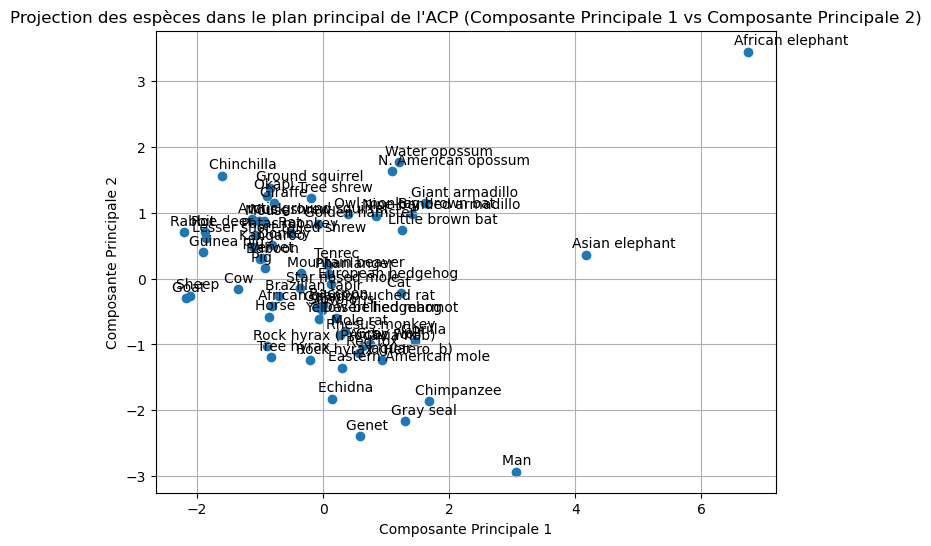

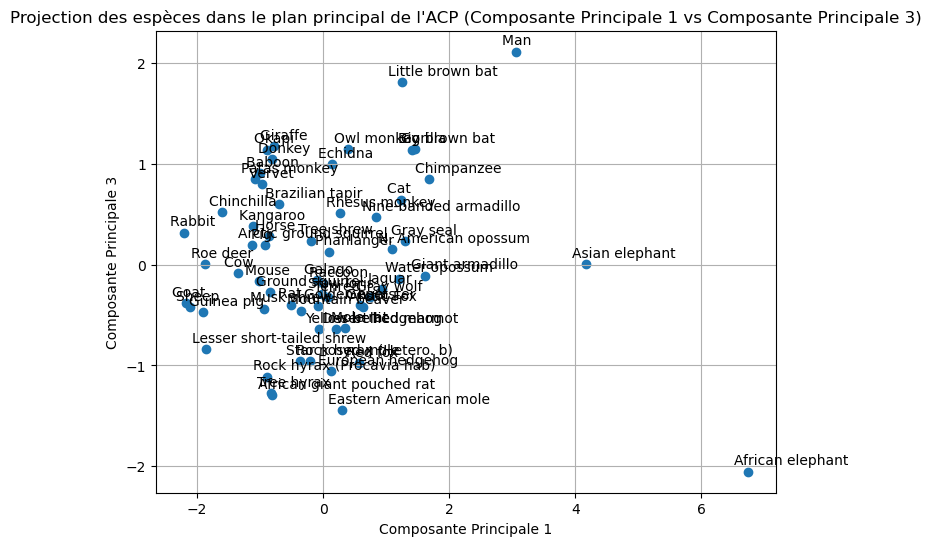

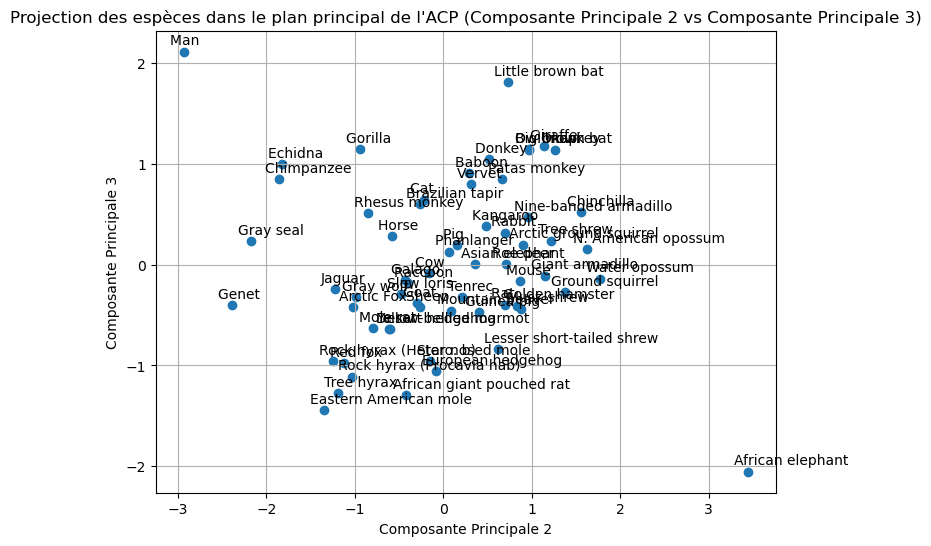

In [27]:
# Créer une liste de noms pour les composantes principales
component_names = ['Composante Principale 0', 'Composante Principale 1', 'Composante Principale 2', 'Composante Principale 3']

# Boucle sur toutes les combinaisons possibles de composantes principales
for i in range(4):
    for j in range(i+1, 4):  # Évitez de comparer une composante principale à elle-même
        plt.figure(figsize=(8, 6))
        plt.scatter(X_pca[:, i], X_pca[:, j])

        for label, x, y in zip(labels, X_pca[:, i], X_pca[:, j]):
            plt.annotate(label, xy=(x, y), xytext=(-10, 5), textcoords='offset points')

        plt.xlabel(component_names[i])
        plt.ylabel(component_names[j])
        plt.title(f'Projection des espèces dans le plan principal de l\'ACP ({component_names[i]} vs {component_names[j]})')
        plt.grid(True)
        plt.show()

### Question 4

In [93]:
#Importation du fichier 
data = pd.read_csv('./crimes.csv', sep=';')

In [94]:
data.head()

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [95]:
data.columns

Index(['Etat ', 'Meutre', 'Rapt', 'Vol', 'Attaque', 'Viol', 'Larcin',
       'Auto_Theft'],
      dtype='object')

In [96]:
# Sélectionner les variables que l'on souhaite inclure dans l'ACP
X = data.iloc[:, 1:].values  # Excluez la première colonne (noms des crimes)
labels = data.iloc[:, 0].values  # Etat

In [97]:
X.shape #Initialement, on a 7 variables.

(50, 7)

In [98]:
#On va centrer et réduire nos variables
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [99]:
pca = PCA(n_components=0.85)  # Explique 85% de la variance
X_pca = pca.fit_transform(X_standardized)

Ici 3 variables expliquent 85% de la variance de nos données initiales.

In [101]:
cor = pca.components_[:2, :]
pd.DataFrame(cor, columns = data.columns[1:13])

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,0.300279,0.431759,0.396875,0.396652,0.440157,0.357360,0.295177
1,-0.629174,-0.169435,0.042247,-0.343528,0.203341,0.402319,0.502421


In [28]:
pca.explained_variance_ratio_

array([0.58785136, 0.17696026, 0.10368809])

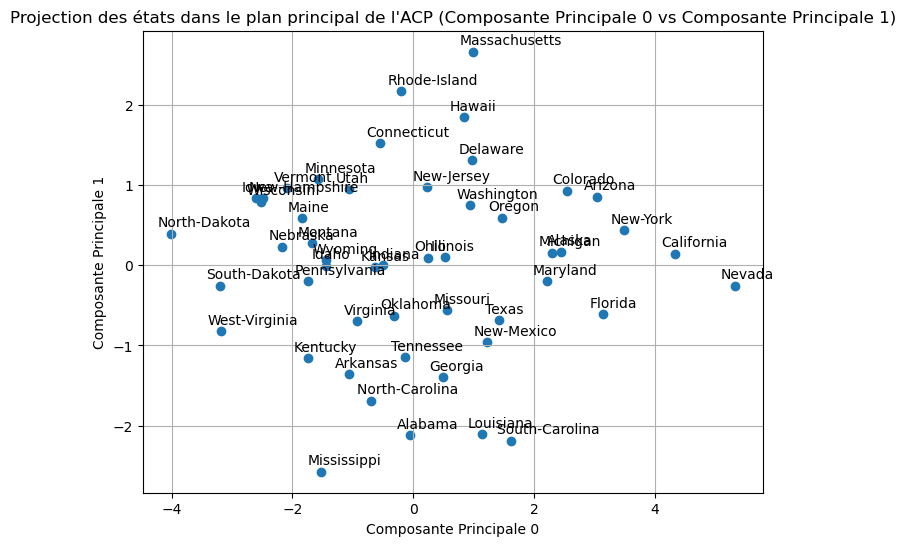

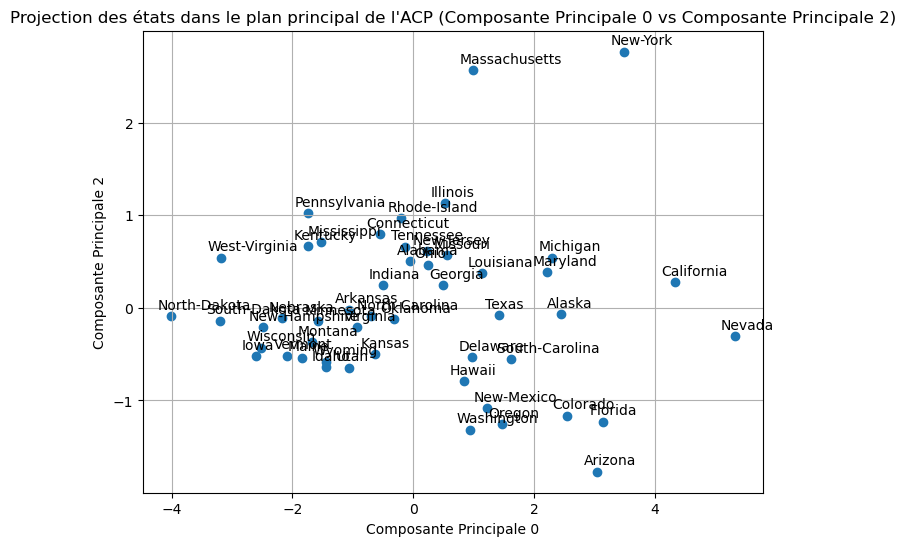

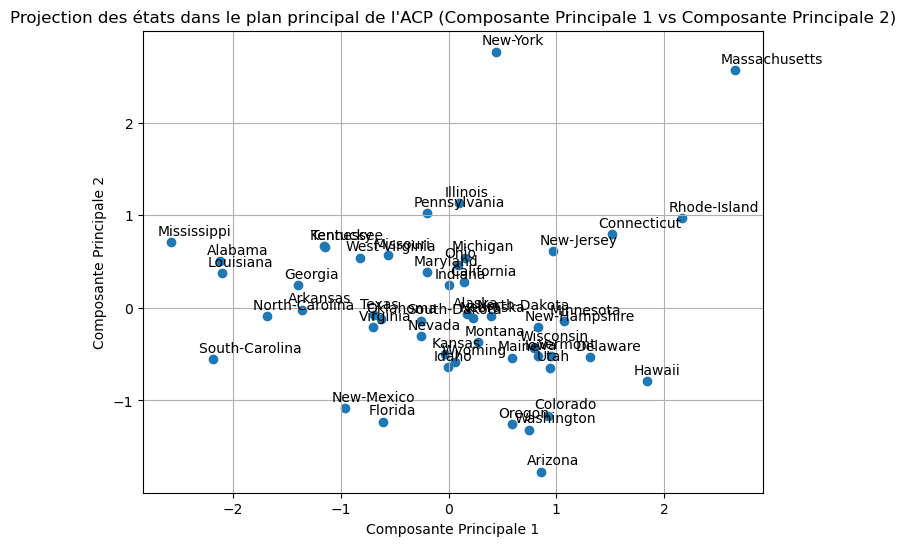

In [29]:
# Créer une liste de noms pour les composantes principales
component_names = ['Composante Principale 0', 'Composante Principale 1', 'Composante Principale 2', 'Composante Principale 3']

# Boucle sur toutes les combinaisons possibles de composantes principales
for i in range(3):
    for j in range(i+1, 3):  # Évitez de comparer une composante principale à elle-même
        plt.figure(figsize=(8, 6))
        plt.scatter(X_pca[:, i], X_pca[:, j])

        for label, x, y in zip(labels, X_pca[:, i], X_pca[:, j]):
            plt.annotate(label, xy=(x, y), xytext=(-10, 5), textcoords='offset points')

        plt.xlabel(component_names[i])
        plt.ylabel(component_names[j])
        plt.title(f'Projection des états dans le plan principal de l\'ACP ({component_names[i]} vs {component_names[j]})')
        plt.grid(True)
        plt.show()

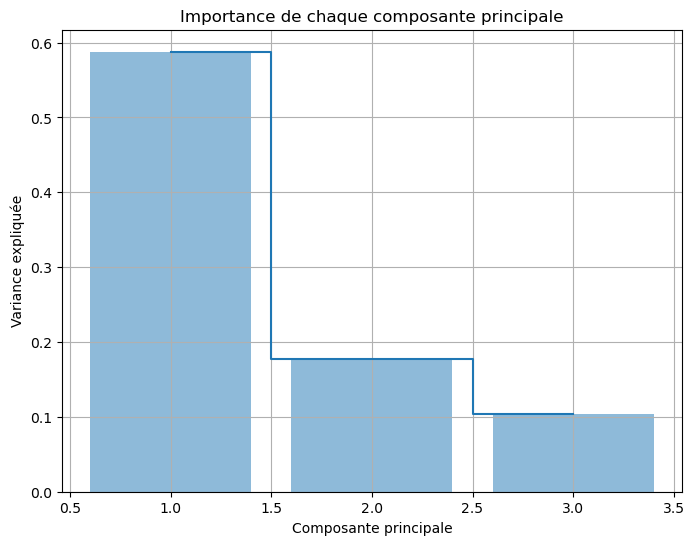

In [30]:
# Obtenir les valeurs de variance expliquée pour chaque composante
explained_variance_ratio = pca.explained_variance_ratio_

# Créer un graphique montrant l'importance de chaque composante
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, where='mid')
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée')
plt.title('Importance de chaque composante principale')
plt.grid(True)
plt.show()

### Question 5

In [121]:
#Importation du fichier 
data = pd.read_csv('./50_Startups.csv', sep=';')

In [122]:
data.head()

,Id,Depenses R&D,Depenses Administration,Depenses Marketing Spend,Benefice
0,1,165349.20,136897.80,471784.10,192261.83
1,2,162597.70,151377.59,443898.53,191792.06
2,3,153441.51,101145.55,407934.54,191050.39
3,4,144372.41,118671.85,383199.62,182901.99
4,5,142107.34,91391.77,366168.42,166187.94


In [123]:
data.columns

Index(['Id', 'Depenses R&D', 'Depenses Administration',
       'Depenses Marketing Spend', 'Benefice'],
      dtype='object')

In [124]:
# Sélectionner les variables que l'on souhaite inclure dans l'ACP
X = data.iloc[:, 1:].values  # Excluez la première colonne (noms des crimes)
labels = data.iloc[:, 0].values  # Startups

In [126]:
#On va centrer et réduire nos variables
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [127]:
pca = PCA(n_components=0.9)  # Conserve 90% de la variance
X_pca = pca.fit_transform(X_standardized)

2 variables suffisent pour expliquer 90% de la variance

In [109]:
cor = pca.components_[:2, :]
pd.DataFrame(cor, columns = data.columns[1:13])

,Depenses R&D,Depenses Administration,Depenses Marketing Spend,Benefice
0,0.593479,0.147379,0.520647,0.595810
1,-0.040481,-0.950513,0.307971,0.006321


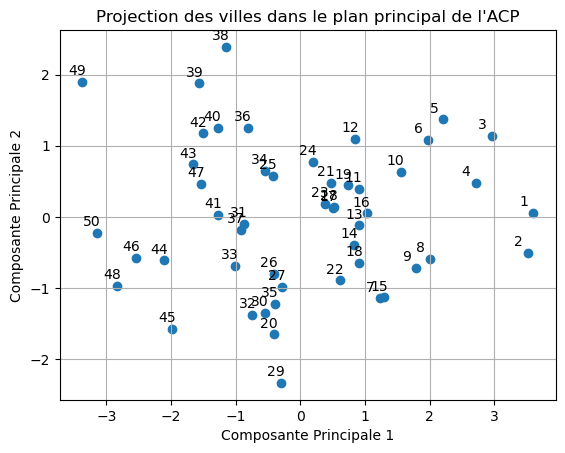

In [39]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1])

for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-10, 5), textcoords='offset points')

plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des villes dans le plan principal de l\'ACP')
plt.grid(True)
plt.show()

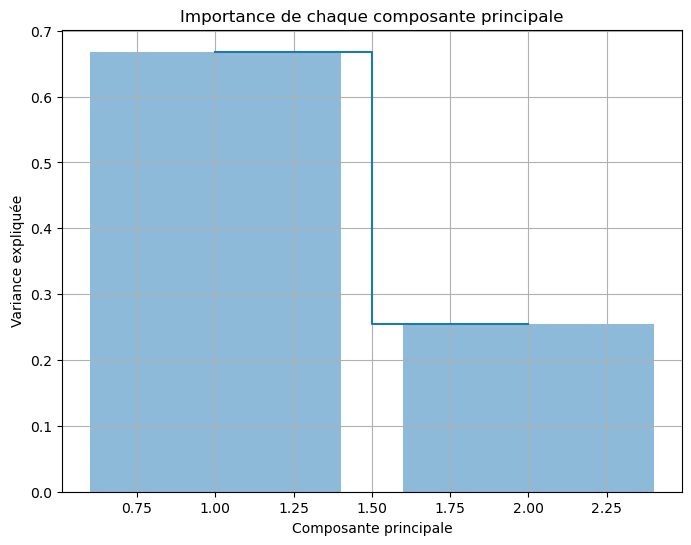

In [40]:
# Obtenir les valeurs de variance expliquée pour chaque composante
explained_variance_ratio = pca.explained_variance_ratio_

# Créer un graphique montrant l'importance de chaque composante
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, where='mid')
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée')
plt.title('Importance de chaque composante principale')
plt.grid(True)
plt.show()

# Clustering

K-Means : C'est un algorithme de partitionnement qui divise l'ensemble de données en K clusters, où K est un nombre prédéfini. Il fonctionne en itérativement assignant chaque point au cluster le plus proche du centroïde (centre) du cluster, puis en recalculant les centroïdes jusqu'à convergence.

Agglomerative Clustering : C'est un algorithme hiérarchique qui construit une hiérarchie de clusters en fusionnant successivement les clusters les plus proches les uns des autres. Il commence avec chaque point comme un cluster individuel et fusionne progressivement les clusters jusqu'à ce qu'un seul cluster global soit formé.

Le choix dépend souvent de la nature des données et des objectifs spécifiques de l'analyse.

### Question 1

In [41]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib

In [42]:
# Charger les données depuis le fichier "villes.csv"
data = pd.read_csv('./villes.csv', sep=';')

# Sélectionner les caractéristiques que vous souhaitez utiliser pour le clustering
X = data.iloc[:, 1:13]

In [46]:
# Standardiser les données
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [47]:
# Effectuer l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

In [48]:
kmeans = KMeans(n_clusters=3)

In [49]:
# Adapter le modèle aux données
kmeans.fit(X_standardized)

KMeans(n_clusters=3)

In [50]:
# Obtenir les étiquettes de cluster pour chaque ville
labels = kmeans.labels_

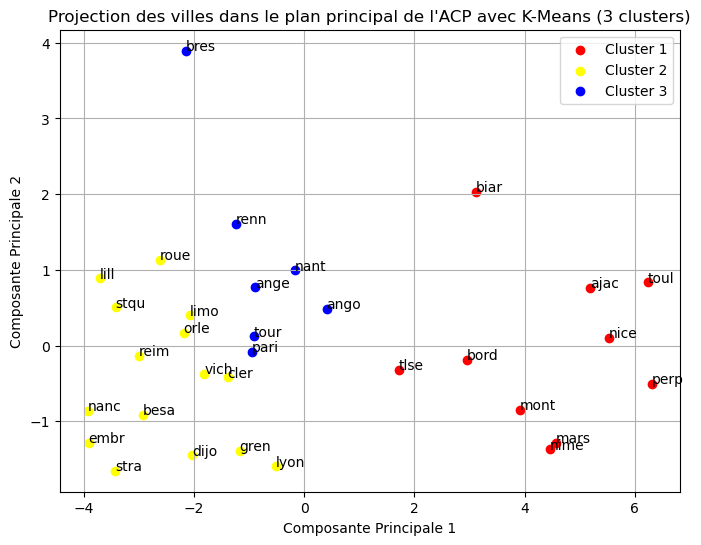

In [51]:
# Créer une liste de couleurs distinctes pour chaque cluster
colors = ['red', 'yellow', 'blue']

#Créer un graphique pour visualiser les clusters
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], c=colors[i], label=f'Cluster {i + 1}')

for label, x, y in zip(data['ville'], X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des villes dans le plan principal de l\'ACP avec K-Means (3 clusters)')
plt.legend()
plt.grid(True)
plt.show()

### Question 2

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Procédure AgglomerativeClustering avec la méthode d'agrégation single

In [53]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='single')

In [54]:
labels = clustering.fit_predict(X_standardized)

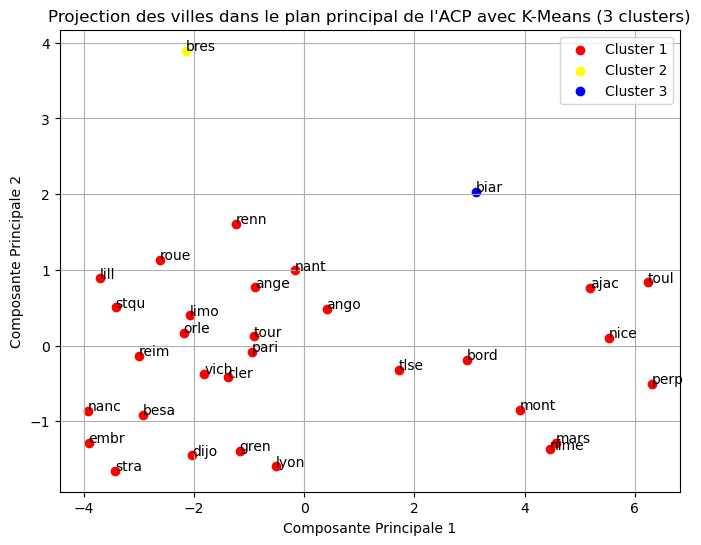

In [55]:
# Liste de couleurs distinctes pour chaque cluster
colors = ['red', 'yellow', 'blue','pink']

# Graphique pour visualiser les clusters
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], c=colors[i], label=f'Cluster {i + 1}')

for label, x, y in zip(data['ville'], X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des villes dans le plan principal de l\'ACP avec K-Means (3 clusters)')
plt.legend()
plt.grid(True)
plt.show()

### Procédure AgglomerativeClustering avec la méthode d'agrégation ward

In [56]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')

In [57]:
labels = clustering.fit_predict(X_standardized)

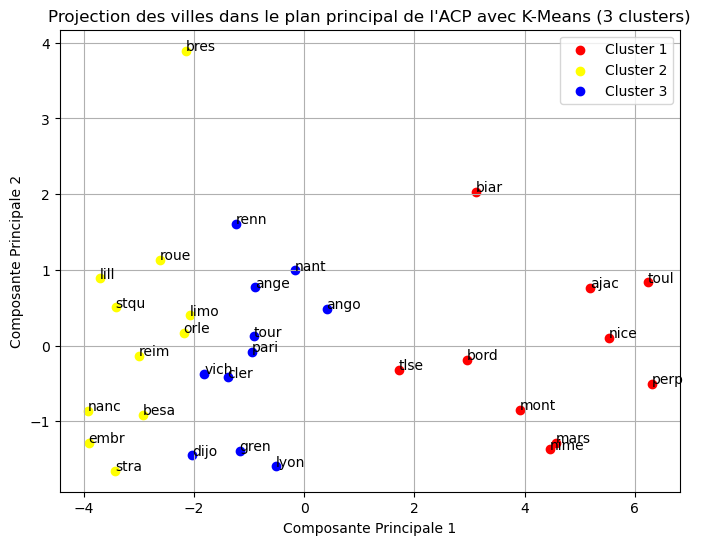

In [58]:
# Créer une liste de couleurs distinctes pour chaque cluster
colors = ['red', 'yellow', 'blue','pink']

# Créer un graphique pour visualiser les clusters
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], c=colors[i], label=f'Cluster {i + 1}')

for label, x, y in zip(data['ville'], X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des villes dans le plan principal de l\'ACP avec K-Means (3 clusters)')
plt.legend()
plt.grid(True)
plt.show()

### Procédure AgglomerativeClustering avec la méthode d'agrégation average

In [59]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='average')

In [60]:
labels = clustering.fit_predict(X_standardized)

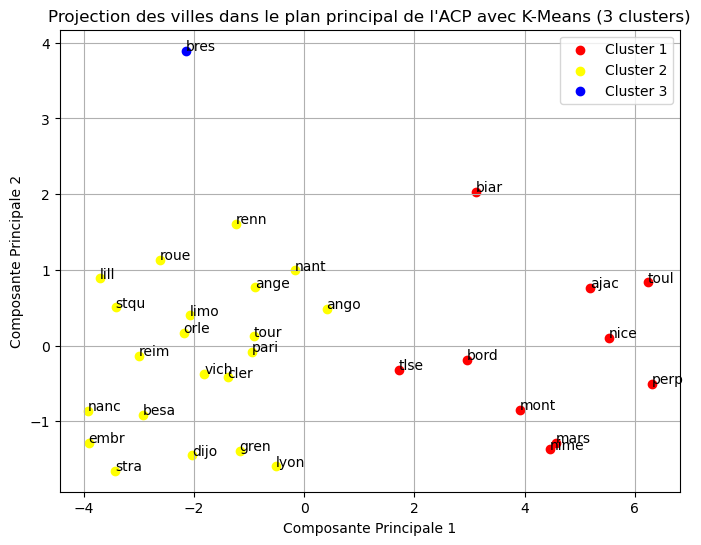

In [62]:
# Créer une liste de couleurs distinctes pour chaque cluster
colors = ['red', 'yellow', 'blue','pink']

# Créer un graphique pour visualiser les clusters
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], c=colors[i], label=f'Cluster {i + 1}')

for label, x, y in zip(data['ville'], X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des villes dans le plan principal de l\'ACP avec K-Means (3 clusters)')
plt.legend()
plt.grid(True)
plt.show()

### Question 3
Silhouette index : 
Une valeur proche de 1 indique que les points sont bien regroupés à l'intérieur de leur cluster et séparés des autres clusters, ce qui est souhaitable.
Une valeur proche de 0 indique que les points sont proches de la limite entre deux clusters, ce qui suggère un chevauchement ou une ambiguïté dans la partition.
Une valeur proche de -1 indique que les points ont été attribués au mauvais cluster. La silhouette_score mesure à quel point chaque point d'un cluster est similaire aux autres points de ce cluster par rapport aux points du cluster voisin le plus proche.

Davies Bouldin :
Dans le contexte de l'apprentissage non supervisé, un score de Davies-Bouldin faible est souhaitable, car il indique une meilleure qualité de partition. Il est également utile pour déterminer le nombre optimal de clusters, car vous pouvez comparer les scores de différentes partitions et choisir celle avec le score Davies-Bouldin le plus bas.

In [63]:
#Pour l'indice silhouette, on a:
from sklearn import metrics 
for i in np.arange(2, 9):
    clustering = KMeans(n_clusters=i).fit_predict(X_standardized) 
    print(metrics.silhouette_score(X_standardized, clustering,metric='euclidean')) 
    print()

0.625557719180767

0.3787440049648761

0.34460702569765045

0.3420395230554875

0.31432391345862326

0.32444173705675905

0.37174337977441385



In [54]:
# Pour l'indice de Davies Bouldin, on a :
from sklearn import metrics 
for i in np.arange(2, 9):
    clustering = KMeans(n_clusters=i).fit_predict(X_standardized) 
    print(metrics.davies_bouldin_score(X_standardized, clustering)) 
    print()

0.513446554194829

0.9321100917482427

0.6911363031557973

0.7998827463384456

0.8214061025008652

0.7072173323666514

0.673576813051314



### Question 4

In [64]:
#Pour l'indice silhouette, on a:
agrégation = ['single', 'ward', 'average']
from sklearn import metrics 
for k in agrégation:
    print('Agrégation : {}'.format(k))
    clustering = AgglomerativeClustering(n_clusters=3, linkage = k).fit_predict(X_standardized) 
    print(metrics.silhouette_score(X_standardized, clustering,metric='euclidean')) 
    

Agrégation : single
-0.03440482633721334
Agrégation : ward
0.36807826080005457
Agrégation : average
0.49568744626910916


In [71]:
#Pour l'indice de davies_bouldin, on a:
agrégation = ['single', 'ward', 'average']
from sklearn import metrics 
for k in agrégation:
    print('Agrégation : {}'.format(k))
    clustering = AgglomerativeClustering(n_clusters=3, linkage = k).fit_predict(X_standardized) 
    print('Indice de davies Bouldin')
    print(metrics.davies_bouldin_score(X_standardized, clustering)) 

Agrégation : single
Indice de davies Bouldin
0.7376339494216082
Agrégation : ward
Indice de davies Bouldin
0.9633862417008047
Agrégation : average
Indice de davies Bouldin
0.45355260397236874


In [69]:
#Pour les Kmeans avec silhouette, on a:

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_standardized)
labels = kmeans.labels_
metrics.silhouette_score(X_standardized, labels,metric='euclidean')

0.37382458484049574

In [70]:
# Avec Davies Bouldin, on a:
metrics.davies_bouldin_score(X_standardized, labels)

0.9124955919982899

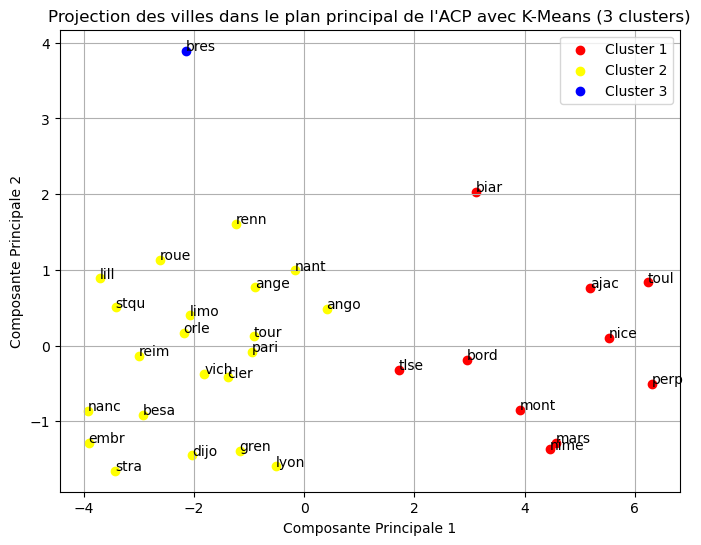

In [72]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = clustering.fit_predict(X_standardized)
# Créer une liste de couleurs distinctes pour chaque cluster
colors = ['red', 'yellow', 'blue','pink']

# Créer un graphique pour visualiser les clusters
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], c=colors[i], label=f'Cluster {i + 1}')

for label, x, y in zip(data['ville'], X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des villes dans le plan principal de l\'ACP avec K-Means (3 clusters)')
plt.legend()
plt.grid(True)
plt.show()

D'après l'analyse faite précédemment, on conclue que l'algorithme qui permet d'obtenir la meilleure partition pour 3 cluster est l'AgglomerativeClustering avec la méthode d'agrégation average. On voit que l'on sépare notre données avec approcimativement une droite en y = 3 et une autre en x = 1